In [9]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [10]:
df = pd.read_excel('dataset/marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# Understanding the Dataset

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df.shape

(2240, 29)

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Data Processing

In [15]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

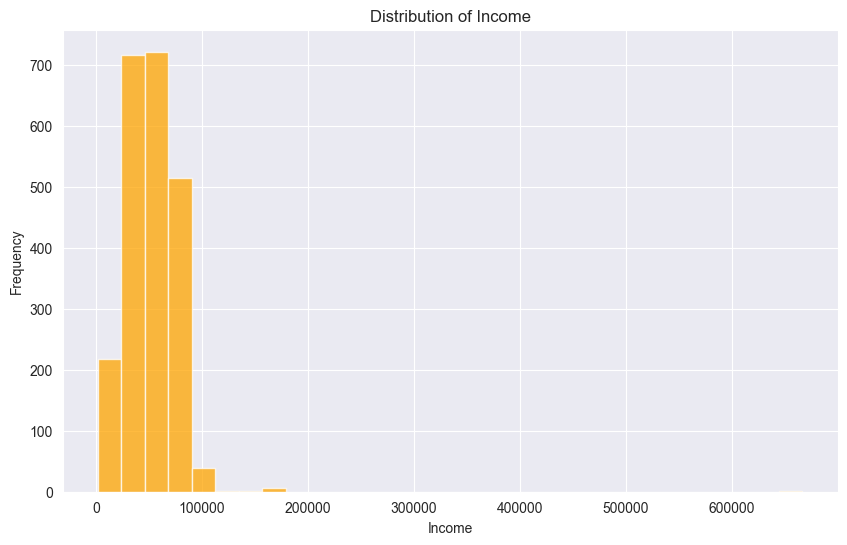

In [16]:
# Check if 'Income' column contains null values and handle them
if df['Income'].isnull().any():
    df_filtered = df['Income'].dropna()  # Removing NaN values
else:
    df_filtered = df['Income']

# Create a histogram for the 'Income' distribution
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.hist(df_filtered, bins=30, color='orange', alpha=0.75)  # Adjust bin size as needed

# Adding labels and title for clarity
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

##### Since the data is left-skewed, we will use the median to impute the missing values, as it is less affected by outliers and better represents the central tendency in such distributions.

In [17]:
#FILLING THE MISSING VALUES WITH THE MEDIAN VALUES
df['Income']=df['Income'].fillna(df['Income'].median())

## RECHECKING FOR DUPLICATES

In [18]:
df.duplicated().any()

np.False_

In [19]:
has_duplicates = df.duplicated().any()
print(f"Are there any duplicate rows? {'Yes' if has_duplicates else 'No'}")

Are there any duplicate rows? No


In [20]:
# Determine and display the count of unique values in each column
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Column Name', 'Unique Value Count']
unique_counts.style.set_caption("Unique Values per Column").set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]}]
)

,Column Name,Unique Value Count
0,ID,2240
1,Year_Birth,59
2,Education,5
3,Marital_Status,8
4,Income,1975
5,Kidhome,3
6,Teenhome,3
7,Dt_Customer,663
8,Recency,100
9,MntWines,776


### "Z_CostContact", "Z_Revenue" are dropped because they are constant no meaningful variation.

In [21]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [22]:
# Checking how many distinct categories are present in the "Year_Birth"
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


In [23]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### Group education into 'UG' and 'PG'

In [24]:

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

In [25]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### Consolidating marital status into broader groups "Relationship" and "Single"

In [26]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [27]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [28]:
df['Teenhome'].unique()

array([0, 1, 2])

In [29]:
df['Kidhome'].unique()

array([0, 1, 2])

### Reduce dimensionality and redundancy by aggregating related features into a single column

In [30]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [31]:
df[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [32]:
df['MntFishProducts'].nunique()

182

In [33]:
df['MntFruits'].nunique()

158

### Reduce dimensionality and redundancy by aggregating related features into a single column

In [34]:
df['Expenditure'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenditure'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenditure, dtype: int64

In [35]:
df['Expenditure'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenditure, dtype: float64

In [36]:
df['AcceptedCmp1'].unique()

array([0, 1])

In [37]:
df['AcceptedCmp2'].unique()

array([0, 1])

### Reduce dimensionality and redundancy by aggregating related features into a single column

In [38]:
df['Overall_Accepted_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [39]:
print("Unique categories present in the Overall_Accepted_Cmp:",df['Overall_Accepted_Cmp'].value_counts())
print("\n")

Unique categories present in the Overall_Accepted_Cmp: Overall_Accepted_Cmp
0    1777
1     325
2      83
3      44
4      11
Name: count, dtype: int64




In [40]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25])

In [41]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22])

In [42]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1])

### Reduce dimensionality and redundancy by aggregating related features into a single column

In [43]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [44]:
df[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [45]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

### ADDING A COLUMN "customer_Age"

In [46]:
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,1617,0,25,68
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,27,0,6,71
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,0,21,60
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,53,0,8,41
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,422,0,19,44


In [47]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,1617,0,25,68
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,27,0,6,71
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,0,21,60
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,53,0,8,41
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,422,0,19,44


### Dropping less informative columns to reduce dimensionality and simplify the model

In [48]:
col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [49]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


### Derived 'Customer_Shop_Days' to capture customer tenure in days

In [50]:
#Created a feature "Customer_Shop_Days"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_Shop_Days"] = days
df['Customer_Shop_Days'] = df['Customer_Shop_Days'].apply(lambda x:x.days)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Education             2240 non-null   object        
 1   Marital_Status        2240 non-null   object        
 2   Income                2240 non-null   float64       
 3   Dt_Customer           2240 non-null   datetime64[ns]
 4   Recency               2240 non-null   int64         
 5   Complain              2240 non-null   int64         
 6   Response              2240 non-null   int64         
 7   Children              2240 non-null   int64         
 8   Expenditure           2240 non-null   int64         
 9   Overall_Accepted_Cmp  2240 non-null   int64         
 10  NumTotalPurchases     2240 non-null   int64         
 11  Customer_Age          2240 non-null   int64         
 12  Customer_Shop_Days    2240 non-null   int64         
dtypes: datetime64[ns](

In [52]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [53]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
0,Post Graduate,Single,58138.0,0,1617,0,25,68,663
1,Post Graduate,Single,46344.0,2,27,0,6,71,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,60,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,41,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,44,161


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Marital_Status        2240 non-null   object 
 2   Income                2240 non-null   float64
 3   Children              2240 non-null   int64  
 4   Expenditure           2240 non-null   int64  
 5   Overall_Accepted_Cmp  2240 non-null   int64  
 6   NumTotalPurchases     2240 non-null   int64  
 7   Customer_Age          2240 non-null   int64  
 8   Customer_Shop_Days    2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


# EDA

In [55]:
df.shape

(2240, 9)

### Impact of Education on Expenditure

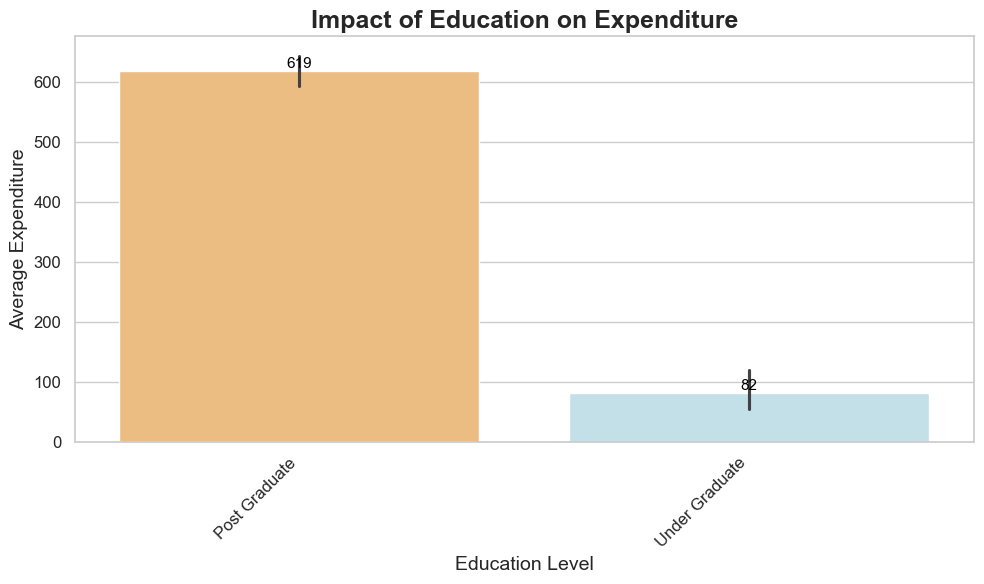

In [56]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
ax = sns.barplot(x="Education", y="Expenditure", data=df, palette="RdYlBu")

plt.title("Impact of Education on Expenditure", fontsize=18, fontweight='bold')
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Average Expenditure", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

### Impact of Marital Status on Expenditure

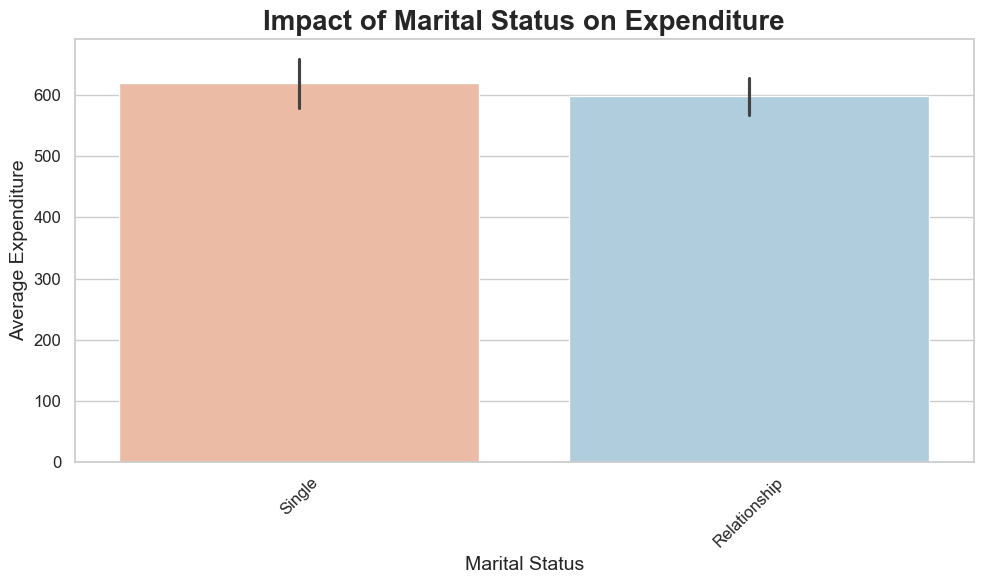

In [57]:
sns.set_theme(style="whitegrid")

# Create a bar plot for the relationship between Marital_Status and Expenditure
plt.figure(figsize=(10, 6))
plt.title("Impact of Marital Status on Expenditure", fontsize=20, fontweight="bold")
ax = sns.barplot(x="Marital_Status", y="Expenditure", data=df, palette="RdBu")

plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Average Expenditure", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Impact of Number of Children on Expenditure

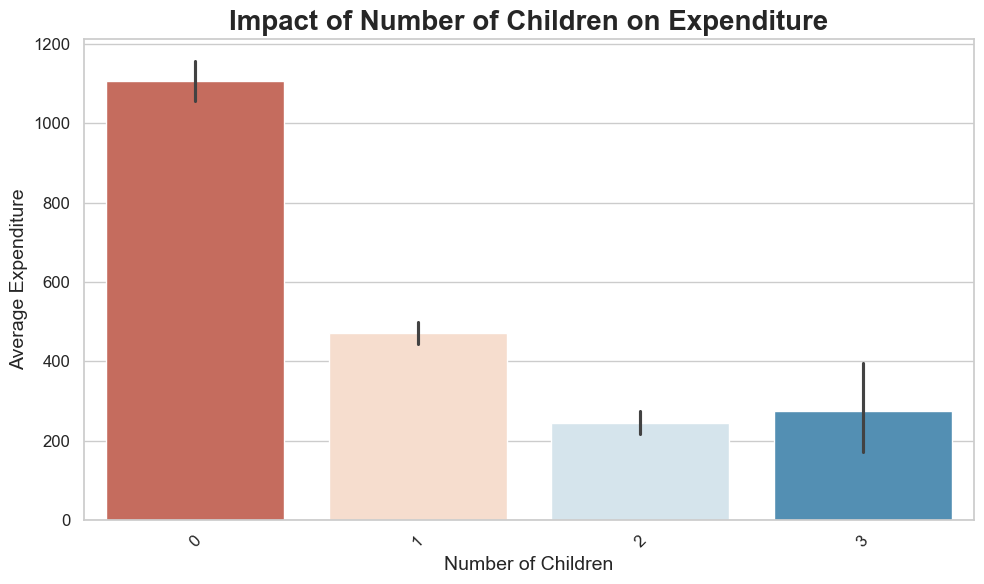

In [58]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Impact of Number of Children on Expenditure", fontsize=20, fontweight="bold")
ax = sns.barplot(x="Children", y="Expenditure", data=df, palette="RdBu")


plt.xlabel("Number of Children", fontsize=14)
plt.ylabel("Average Expenditure", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Impact of Overall Campaign Acceptance on Expenditure

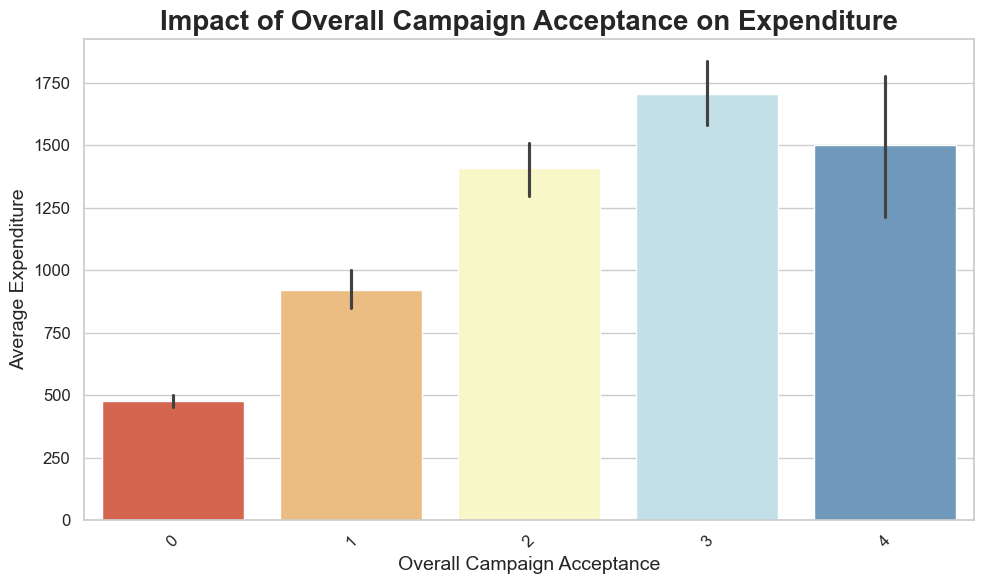

In [59]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Impact of Overall Campaign Acceptance on Expenditure", fontsize=20, fontweight="bold")
ax = sns.barplot(x="Overall_Accepted_Cmp", y="Expenditure", data=df, palette="RdYlBu")


plt.xlabel("Overall Campaign Acceptance", fontsize=14)
plt.ylabel("Average Expenditure", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Impact of Total Number of Purchases on Expenditure

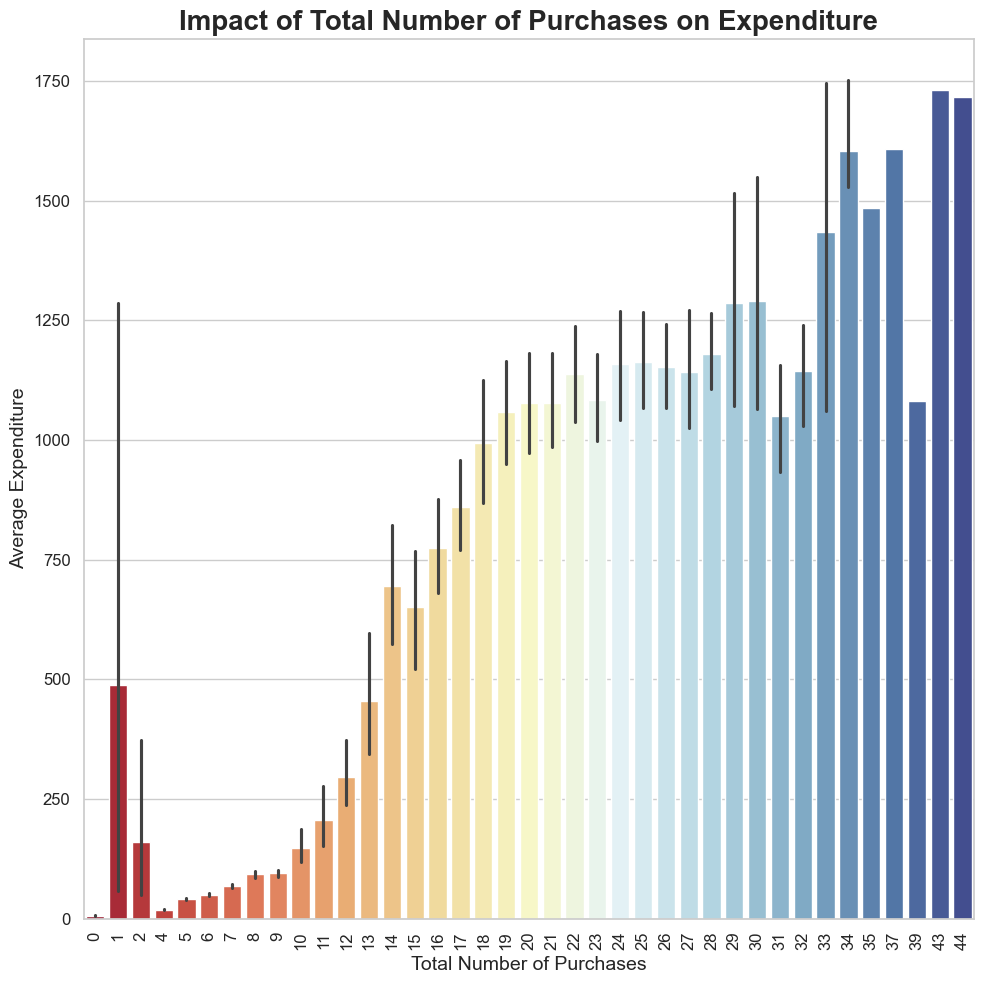

In [60]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 10))
plt.title("Impact of Total Number of Purchases on Expenditure", fontsize=20, fontweight="bold")
ax = sns.barplot(x="NumTotalPurchases", y="Expenditure", data=df, palette="RdYlBu")

plt.xlabel("Total Number of Purchases", fontsize=14)
plt.ylabel("Average Expenditure", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Impact of Customer Engagement (Days Engaged) on Expenditure (Line Plot)

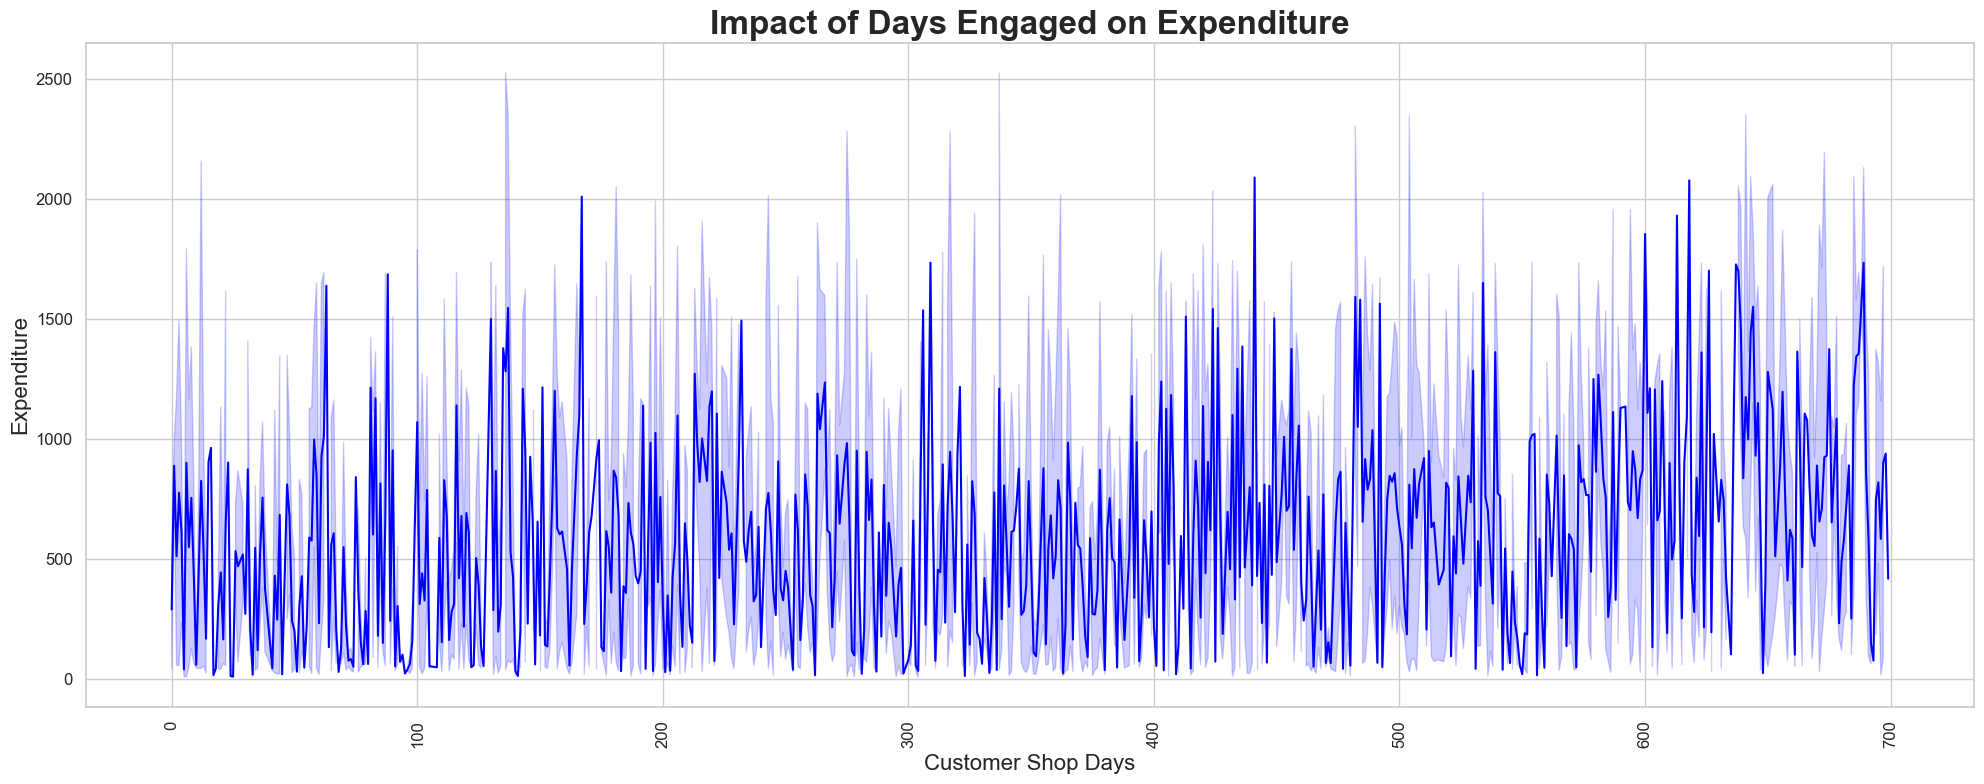

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 8))
plt.title("Impact of Days Engaged on Expenditure", fontsize=24, fontweight="bold")
plt.xlabel("Customer Shop Days", fontsize=16)
plt.ylabel("Expenditure", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Create a line plot with a distinct color
ax = sns.lineplot(x="Customer_Shop_Days", y="Expenditure", data=df, color="blue")

plt.tight_layout()
plt.show()

### Scatter Plot: Customer Shop Days vs. Expenditure

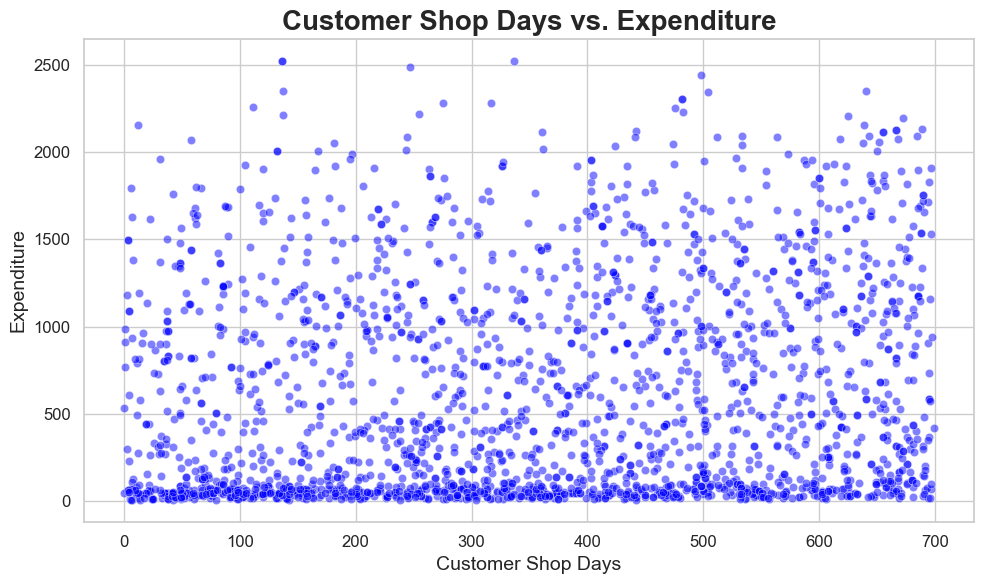

In [62]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Customer Shop Days vs. Expenditure", fontsize=20, fontweight="bold")
plt.xlabel("Customer Shop Days", fontsize=14)
plt.ylabel("Expenditure", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = sns.scatterplot(data=df, x="Customer_Shop_Days", y="Expenditure", color="blue", alpha=0.5)

plt.tight_layout()
plt.show()

### Impact of Customer Age on Expenditure

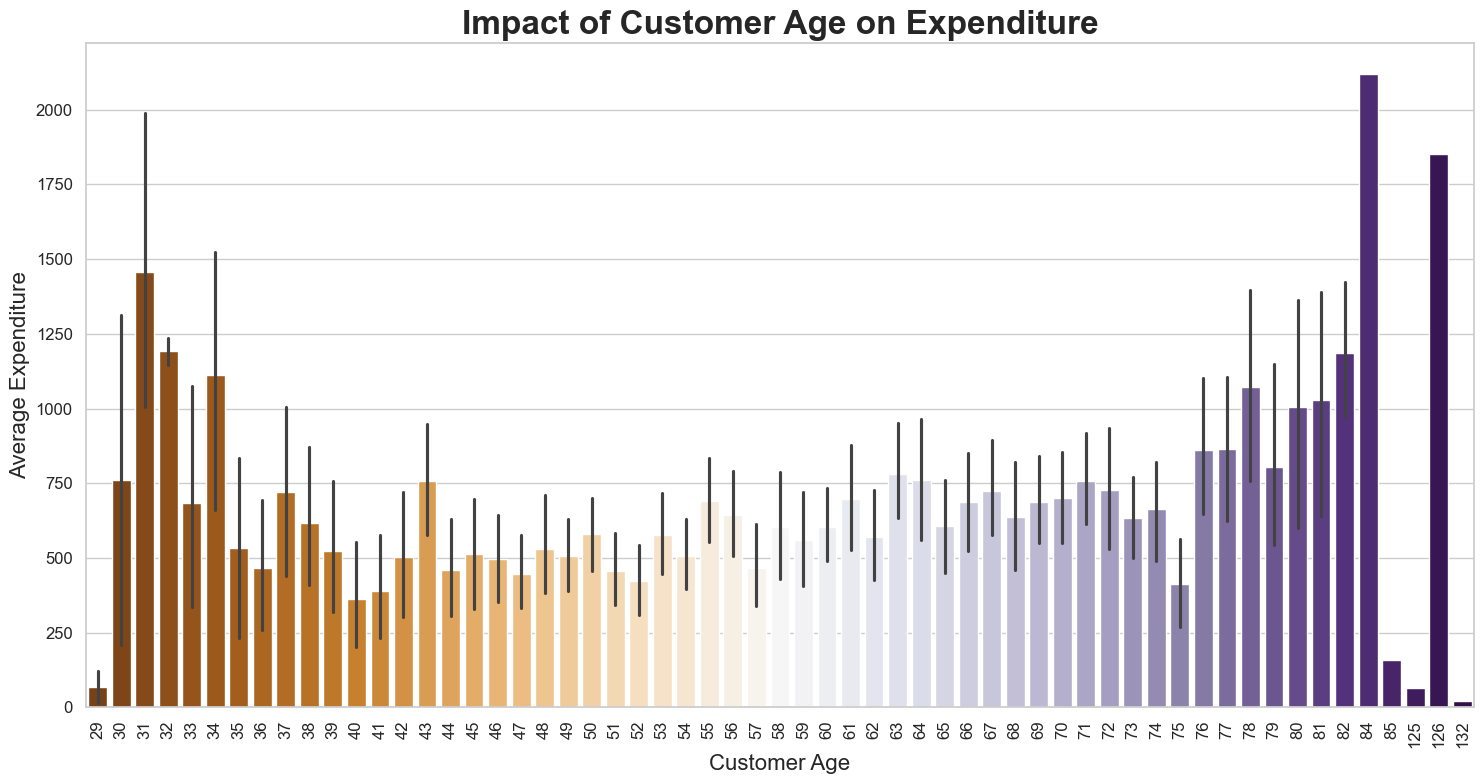

In [63]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 8))
plt.title("Impact of Customer Age on Expenditure", fontsize=24, fontweight="bold")
plt.xlabel("Customer Age", fontsize=16)
plt.ylabel("Average Expenditure", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Use a diverging palette for better visual contrast
ax = sns.barplot(x="Customer_Age", y="Expenditure", data=df, palette="PuOr")

plt.tight_layout()
plt.show()

## Impact of Education on Expenditure
The chart illustrates a significant disparity in expenditure between Post Graduates and Under Graduates, with Post Graduates spending much more. This suggests a correlation between higher education levels and increased consumer spending.

## Impact of Marital Status on Expenditure
This visualization compares expenditure between ‘Single’ and ‘Relationship’ categories, showing higher spending among individuals who are single. The data indicates that marital status may influence spending habits, with single individuals potentially having fewer financial commitments.

## Impact of Number of Children on Expenditure
The expenditure decreases significantly as the number of children increases. Households with no children spend considerably more than those with one or more children, highlighting how parental responsibilities might curb discretionary spending.

## Impact of Overall Campaign Acceptance on Expenditure
Expenditure increases with the number of campaigns accepted, illustrating a positive relationship between engagement with marketing campaigns and spending levels. This suggests that highly engaged customers are more likely to increase their spending.

## Impact of Total Number of Purchases on Expenditure
There’s a clear ascending trend in expenditure as the total number of purchases increases, with expenditure substantially rising as customers make more than 30 purchases. This indicates a strong positive correlation between the frequency of purchases and the amount spent.

## Impact of Days Engaged on Expenditure (Line Plot)
The line plot shows frequent spikes in expenditure as the number of days a customer is engaged increases, suggesting that long-term engagement can lead to periodic increases in spending.

## Impact of Days Engaged on Expenditure (Scatter Plot)
This scatter plot demonstrates that while many customers maintain moderate expenditure regardless of engagement duration, there are notable exceptions with high spending over varied engagement periods. This variability suggests complex dynamics influencing customer expenditure beyond just engagement duration.

## Impact of Customer Age on Expenditure
The expenditure generally increases with customer age, peaking at certain age groups and declining slightly in the very elderly. This pattern might reflect life cycle stages, with peak expenditure occurring in middle age, possibly due to peak earning years.

# Descriptive statistics for 'Income', 'Customer_Age', 'Expenditure', 'NumTotalPurchases'

In [64]:
columns_to_describe = ['Income', 'Customer_Age', 'Expenditure', 'NumTotalPurchases']
for column in columns_to_describe:
    print(f"Descriptive Statistics for {column}:")
    print(df[column].describe(), "\n")

Descriptive Statistics for Income:
count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64 

Descriptive Statistics for Customer_Age:
count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Customer_Age, dtype: float64 

Descriptive Statistics for Expenditure:
count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenditure, dtype: float64 

Descriptive Statistics for NumTotalPurchases:
count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64 



In [65]:
df.shape

(2240, 9)

### Identified and filtered out outliers to refine the dataset for more accurate analysis.

In [66]:
df = df[df['Income'] < 70000]
df = df[df['Customer_Age'] < 90]
df = df[df['Expenditure'] < 1100]
df = df[df['NumTotalPurchases'] < 30]

In [67]:
df.shape

(1570, 9)

In [68]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
1,Post Graduate,Single,46344.0,2,27,0,6,71,113
3,Post Graduate,Relationship,26646.0,1,53,0,8,41,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,44,161
5,Post Graduate,Relationship,62513.0,1,716,0,22,58,293
6,Post Graduate,Single,55635.0,1,590,0,21,54,593


In [69]:
df.dtypes

Education                object
Marital_Status           object
Income                  float64
Children                  int64
Expenditure               int64
Overall_Accepted_Cmp      int64
NumTotalPurchases         int64
Customer_Age              int64
Customer_Shop_Days        int64
dtype: object

### Correlation Matrix and HeatMap of Features

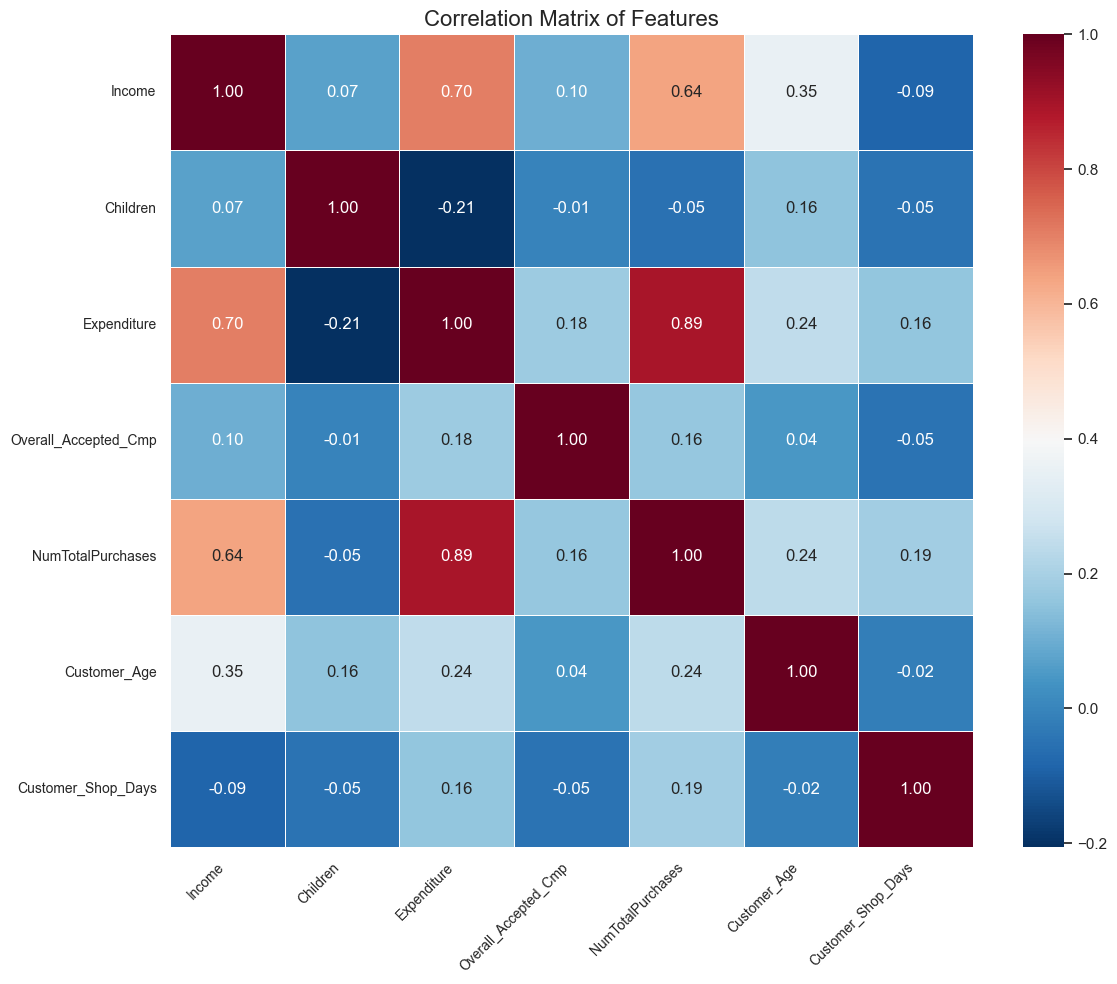

In [70]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='RdBu_r', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [71]:
df.describe()

,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,41706.898408,1.177707,282.061146,0.126752,12.028662,55.689172,343.047134
std,15073.036253,0.684630,300.418620,0.355039,6.719724,11.255600,199.050334
min,1730.000000,0.000000,5.000000,0.000000,0.000000,29.000000,0.000000
25%,30539.750000,1.000000,49.000000,0.000000,6.000000,48.000000,169.250000
50%,41748.500000,1.000000,134.000000,0.000000,10.000000,54.000000,337.500000
75%,53782.750000,2.000000,445.500000,0.000000,17.000000,65.000000,510.000000
max,69932.000000,3.000000,1092.000000,2.000000,29.000000,85.000000,699.000000


# 1)Discovering Hidden Groups (Clustering)
## (A) Elbow Method:
### The idea here is to choose the optimal number of clusters (k) by plotting WCSS (Within-Cluster Sum of Squares)
### for a range of cluster values.


In [72]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Children', 'Expenditure',
       'Overall_Accepted_Cmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_Shop_Days'],
      dtype='object')

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Income', 'Children', 'Expenditure',
       'Overall_Accepted_Cmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_Shop_Days']

df[col_scale] = scaler.fit_transform(df[col_scale])

In [74]:
df['Education'] = df['Education'].map({'Post Graduate': 1, 'Under Graduate': 0})
df['Marital_Status'] = df['Marital_Status'].map({'Relationship': 1, 'Single': 0})

In [75]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
1,1,0,0.307740,1.201458,-0.849290,-0.357121,-0.897445,1.360719,-1.156092
3,1,1,-0.999513,-0.259649,-0.762716,-0.357121,-0.599719,-1.305470,-1.025430
4,1,1,1.100733,-0.259649,0.465961,-0.357121,1.037775,-1.038851,-0.914870
5,1,1,1.380792,-0.259649,1.444907,-0.357121,1.484364,0.205370,-0.251510
6,1,0,0.924335,-0.259649,1.025359,-0.357121,1.335501,-0.150122,1.256127


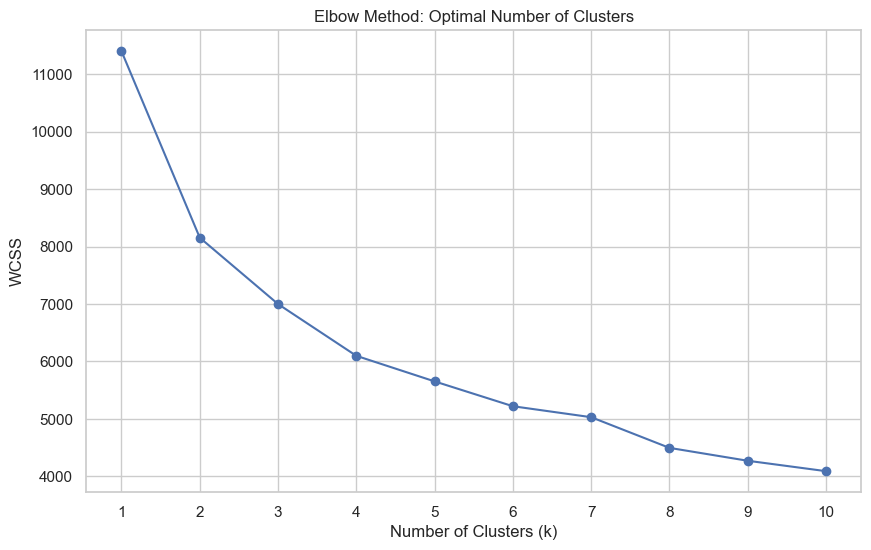

In [76]:
wcss = []  # list to store the WCSS for each k from 1 to 10

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)  # df is your preprocessed data (ensure it contains only relevant features)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()


# Evaluating with Silhouette Score:
### Silhouette score indicates how similar an object is to its own cluster compared to other clusters.
### Scores are between -1 and 1 with higher values indicating better clustering.

For k = 2, the average silhouette score is: 0.281
For k = 3, the average silhouette score is: 0.211
For k = 4, the average silhouette score is: 0.230
For k = 5, the average silhouette score is: 0.209
For k = 6, the average silhouette score is: 0.185
For k = 7, the average silhouette score is: 0.165
For k = 8, the average silhouette score is: 0.199
For k = 9, the average silhouette score is: 0.193
For k = 10, the average silhouette score is: 0.195


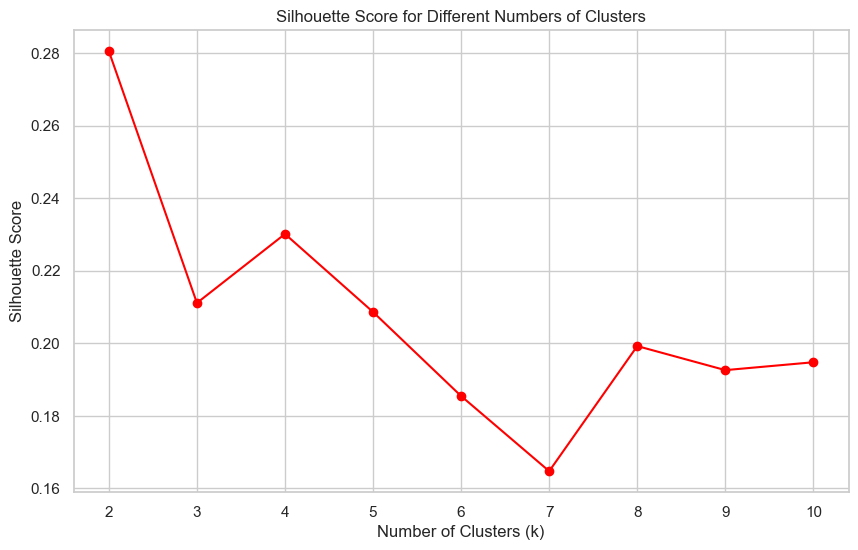

In [77]:
silhouette_scores = []
for k in range(2, 11):  # silhouette_score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the average silhouette score is: {silhouette_avg:.3f}")

# Plot the silhouette scores against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

# Running K-Means with the Chosen Number of Clusters (2):

In [78]:
optimal_k = 2

kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans_model.fit_predict(df)

# Add the cluster labels to your DataFrame
df['Cluster'] = cluster_labels

# Evaluate the clustering result using Silhouette Score
silhouette_avg = silhouette_score(df, cluster_labels)
print(f"Silhouette Score for k = {optimal_k}: {silhouette_avg:.3f}")

Silhouette Score for k = 2: 0.302


In [79]:
# 1. Reduce Dimensions with PCA (to 3 components for 3D plotting)
pca = PCA(n_components=3)
# If your DataFrame contains the cluster labels from K-Means, drop them for PCA
features = df.drop(columns=['KMeans_Cluster'], errors='ignore')
pca_components = pca.fit_transform(features)

# Create a new DataFrame for the PCA results (for clarity)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

In [80]:
pca_df

,PC1,PC2,PC3
0,-0.760364,2.322892,-0.194284
1,-1.784249,-0.342298,0.769061
2,1.144456,-0.234032,0.645569
3,2.437964,-0.100907,-0.036915
4,1.937640,-1.016359,-0.910903
...,...,...,...
1565,-1.903876,-2.609587,-0.349350
1566,-1.577363,-0.245095,-0.086790
1567,2.595553,3.708255,1.221778
1568,3.161826,0.716566,0.190688


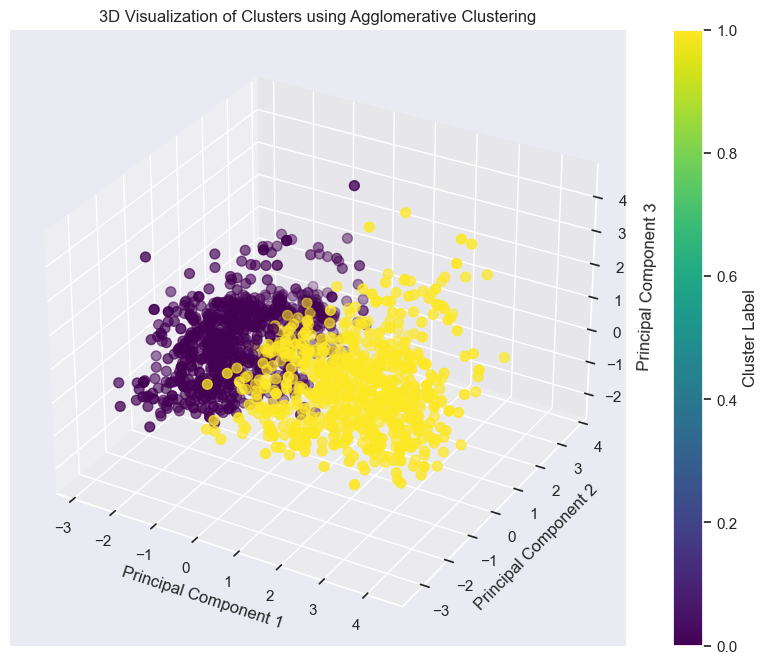

In [81]:
# 2. Apply Agglomerative Clustering on the PCA-transformed data
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(pca_df)
pca_df['Agglo_Cluster'] = agglo_labels

# 3. Visualize the 3D Clusters from Agglomerative Clustering
from mpl_toolkits.mplot3d import Axes3D  # Importing for 3D plotting

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot using the PCA components with cluster coloring
scatter = ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=pca_df['Agglo_Cluster'],
    cmap='viridis',
    s=50  # size of the points
)

ax.set_title("3D Visualization of Clusters using Agglomerative Clustering")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.show()

# Teaching a Computer to Recognize These Groups (Classification)

In [82]:
df_class = df.copy()


In [83]:
df_class.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days,Cluster
1,1,0,0.307740,1.201458,-0.849290,-0.357121,-0.897445,1.360719,-1.156092,0
3,1,1,-0.999513,-0.259649,-0.762716,-0.357121,-0.599719,-1.305470,-1.025430,0
4,1,1,1.100733,-0.259649,0.465961,-0.357121,1.037775,-1.038851,-0.914870,1
5,1,1,1.380792,-0.259649,1.444907,-0.357121,1.484364,0.205370,-0.251510,1
6,1,0,0.924335,-0.259649,1.025359,-0.357121,1.335501,-0.150122,1.256127,1


In [84]:
# Define X (features) and y (target label - our secret cluster groups)
X = df_class.drop(columns=['Cluster'])
y = df_class['Cluster']

# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Model 1: Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.9585987261146497
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       197
           1       0.93      0.97      0.95       117

    accuracy                           0.96       314
   macro avg       0.95      0.96      0.96       314
weighted avg       0.96      0.96      0.96       314



In [86]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(criterion='gini', max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9745222929936306
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       197
           1       0.96      0.97      0.97       117

    accuracy                           0.97       314
   macro avg       0.97      0.97      0.97       314
weighted avg       0.97      0.97      0.97       314



In [87]:
# Model 3: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))

SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       117

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



In [88]:
# Model 4: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.9872611464968153
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       197
           1       0.98      0.98      0.98       117

    accuracy                           0.99       314
   macro avg       0.99      0.99      0.99       314
weighted avg       0.99      0.99      0.99       314



In [89]:
features = X.columns
importances = gb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                Feature  Importance
4           Expenditure    0.775606
6     NumTotalPurchases    0.119586
2                Income    0.058209
7          Customer_Age    0.038676
8    Customer_Shop_Days    0.006896
1        Marital_Status    0.000534
5  Overall_Accepted_Cmp    0.000431
0             Education    0.000032
3              Children    0.000030
